In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,178907.000000,1.789070e+05,178907.000000,178906.000000,178906.000000,178906.000000,1.789050e+05,1.789050e+05,178905.000000,178905.000000,178905.000000
mean,44726.252349,4.172362e+17,70.606468,48758.628414,38.543134,-90.188790,8.938401e+04,1.350387e+09,38.542223,-90.190000,0.006853
std,25823.077389,1.308723e+18,151.825081,26881.756166,5.068430,13.742207,3.021823e+05,2.276712e+07,5.103148,13.755465,0.082498
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,22363.000000,1.800429e+14,9.660000,26237.000000,34.668900,-96.790900,7.430000e+02,1.327684e+09,34.759738,-96.867821,0.000000
50%,44726.000000,3.519607e+15,47.590000,48174.000000,39.371600,-87.461600,2.435000e+03,1.329928e+09,39.371977,-87.419682,0.000000
75%,67089.500000,4.635331e+15,83.400000,72011.000000,41.894800,-80.158000,2.032800e+04,1.373130e+09,41.948611,-80.210998,0.000000
max,89473.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.374442e+09,66.669356,-66.952352,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(38933, 23)
(38896, 23)


In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  77829.000000  7.782900e+04  77828.000000  77827.000000  77827.000000   
mean   19456.754397  4.151286e+17     70.878423  48650.320801     38.541607   
std    11233.728308  1.306157e+18    152.861554  26902.764687      5.076100   
min        0.000000  4.716562e+08      1.000000   1257.000000     20.027100   
25%     9728.000000  1.800429e+14      9.700000  25832.000000     34.668900   
50%    19457.000000  3.518759e+15     47.340000  48088.000000     39.371600   
75%    29185.000000  4.634956e+15     83.260000  72011.000000     41.940400   
max    38932.000000  4.992346e+18  13149.150000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  77827.000000  7.782700e+04  7.782700e+04  77827.000000  77827.000000   
mean     -90.168066  8.951375e+04  1.349359e+09     38.540517    -90.169300   
std       13.782892  3.006264e+05  2.300459e+07    

In [ ]:
test.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2020-06-21 12:14:25  2291163933867244   
1               1   2020-06-21 12:14:33  3573030041201292   
2               2   2020-06-21 12:14:53  3598215285024754   
3               3   2020-06-21 12:15:15  3591919803438423   
4               4   2020-06-21 12:15:17  3526826139003047   
...           ...                   ...               ...   
38891       38891   2020-07-05 02:39:50  4450831335606294   
38892       38892   2020-07-05 02:40:43   377895991033232   
38893       38893   2020-07-05 02:41:09  3541687240161491   
38894       38894   2020-07-05 02:41:11  3501509250702469   
38895       38895   2020-07-05 02:41:16  3576431665303017   

                                   merchant        category     amt     first  \
0                     fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                      fraud_Sporer-Keebler   personal_care   29.84    Jo

In [ ]:
train.info

<bound method DataFrame.info of        Unnamed: 0               cc_num  merchant  category     amt  gender  \
0               0     2703186189652095       514         8    4.97       0   
1               1         630423337322       241         4  107.23       0   
2               2       38859492057661       390         0  220.11       1   
3               3     3534093764340240       360         2   45.00       1   
4               4      375534208663984       297         9   41.96       1   
...           ...                  ...       ...       ...     ...     ...   
38928       38928  4301028321766222513       402         6   74.81       1   
38929       38929       30082025922891        45         7  114.94       0   
38930       38930      213157767990030       347        11   90.35       0   
38931       38931         502012776709       569         1   74.99       0   
38932       38932            471656179       693        14     NaN       2   

       state      zip      lat 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [ ]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)
print(data.shape)

(38933, 23)
(38896, 23)
(77829, 23)


In [ ]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     26   
1           1      630423337322       241         4  107.23       0     46   
2           2    38859492057661       390         0  220.11       1     12   
3           3  3534093764340240       360         2   45.00       1     25   
4           4   375534208663984       297         9   41.96       1     44   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
df_train = pd.read_csv('/content/fraudTest.csv')
df_test = pd.read_csv('/content/fraudTrain.csv')
df = pd.concat([df_train, df_test])

In [ ]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
112704,112704,2020-07-30 14:57:46,375237305371366,fraud_Prosacco LLC,personal_care,80.25,David,Erickson,M,616 Jimenez Meadow Apt. 701,...,43.1128,-77.4906,8019.0,Retail buyer,1928-06-26,e0a903376b284bfdc647738baf56fb45,1.375196e+09,42.418327,-76.922640,0.0
112705,112705,2020-07-30 14:57:48,676102124465,"fraud_Goyette, Howell and Collier",shopping_pos,1.46,Natasha,Mclaughlin,F,8699 Lindsay Ford Apt. 486,...,38.4549,-122.2564,94014.0,Airline pilot,1985-08-21,9d28b37c4825ea481be49cebd7719880,1.375196e+09,37.780422,-121.959296,0.0
112706,112706,2020-07-30 14:58:25,3512365128314616,fraud_Morissette PLC,shopping_pos,7.66,Francisco,Kemp,M,9554 Flores Drive,...,38.4305,-90.3870,35439.0,Land/geomatics surveyor,1985-03-31,a073e1f8926238b2ae000848b81b0fcd,1.375196e+09,38.098254,-90.458243,0.0
112707,112707,2020-07-30 14:58:50,581293083266,"fraud_Becker, Harris and Harvey",personal_care,76.86,William,Thomas,M,39227 Mcpherson Shoals,...,36.3850,-98.0727,1078.0,Podiatrist,1989-10-06,a30fbce40d223f4a5c916004ae8bf284,1.375196e+09,37.347920,-98.425452,0.0
112708,112708,2020-07-30 14:58:52,6534628260579800,fraud_Ratke and Sons,health_fitness,9.20,Christine,Harris,F,29606 Martinez Vi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df_test.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
116616,116616,2019-03-07 05:06:31,36078114201167,fraud_Mraz-Herzog,gas_transport,63.88,Christopher,Horn,M,956 Sanchez Highway,...,37.2692,-82.9161,798,Facilities manager,1926-06-26,5623283e1ed091c1cc5977c73bd0e0e2,1.331097e+09,37.388709,-83.754013,0.0
116617,116617,2019-03-07 05:09:57,6526448584969862,fraud_Deckow-O'Conner,grocery_pos,105.52,Nathan,Stewart,M,63502 Brown Road Apt. 318,...,40.2878,-74.0162,8097,Mechanical engineer,1964-02-18,c47d3142af1c8a6389a0566477d697b2,1.331097e+09,40.107008,-74.254615,0.0
116618,116618,2019-03-07 05:10:08,4092452671396169678,fraud_Kling Inc,gas_transport,45.48,Jeffrey,Vargas,M,478 Alexandria Mount,...,34.3091,-78.3372,2290,"Engineer, biomedical",1945-12-07,35d7019344b6ec0c87c76558184fda70,1.331097e+09,33.826334,-79.320000,0.0
116619,116619,2019-03-07 05:12:28,639095706599,fraud_Goyette Inc,shopping_net,16.84,Kyle,Wilkinson,M,93970 Trujillo Causeway,...,42.9633,-94.7975,223,Estate manager/land agent,1939-04-14,3d8b34ae09cebbbd583653b4a4ce4272,1.331097e+09,42.114731,-95.177616,0.0
116620,116620,2019-03-07 05:12:41,3521417320836166,fraud_Bailey-Morar,grocery_pos,193.69,Angela,Hodges,F,08236 Kim Hill,...,39.8490,-86.2720,910148,Firefighter,1975-11-30,ac46409b175,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229330 entries, 0 to 116620
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             229330 non-null  int64  
 1   trans_date_trans_time  229330 non-null  object 
 2   cc_num                 229330 non-null  int64  
 3   merchant               229330 non-null  object 
 4   category               229330 non-null  object 
 5   amt                    229330 non-null  float64
 6   first                  229330 non-null  object 
 7   last                   229330 non-null  object 
 8   gender                 229330 non-null  object 
 9   street                 229330 non-null  object 
 10  city                   229329 non-null  object 
 11  state                  229329 non-null  object 
 12  zip                    229329 non-null  float64
 13  lat                    229329 non-null  float64
 14  long                   229329 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,229330.000000,2.293300e+05,229330.000000,229329.000000,229329.000000,229329.000000,2.293290e+05,2.293280e+05,229328.000000,229328.000000,229328.000000
mean,57348.683103,4.165772e+17,70.447640,48792.489027,38.538080,-90.206306,8.926711e+04,1.350519e+09,38.538383,-90.206986,0.006698
std,33129.885719,1.307808e+18,150.370036,26884.922099,5.068035,13.742854,3.021304e+05,2.262027e+07,5.102652,13.755950,0.081566
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671575,0.000000
25%,28666.000000,1.800429e+14,9.660000,26237.000000,34.668900,-96.798000,7.430000e+02,1.328308e+09,34.753943,-96.896655,0.000000
50%,57332.000000,3.519607e+15,47.670000,48174.000000,39.371600,-87.461600,2.443000e+03,1.330993e+09,39.370655,-87.424543,0.000000
75%,85998.000000,4.634956e+15,83.390000,72011.000000,41.894800,-80.158000,2.047800e+04,1.373469e+09,41.951148,-80.222914,0.000000
max,116620.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.375196e+09,66.669356,-66.952352,1.000000


In [ ]:
df.shape

df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

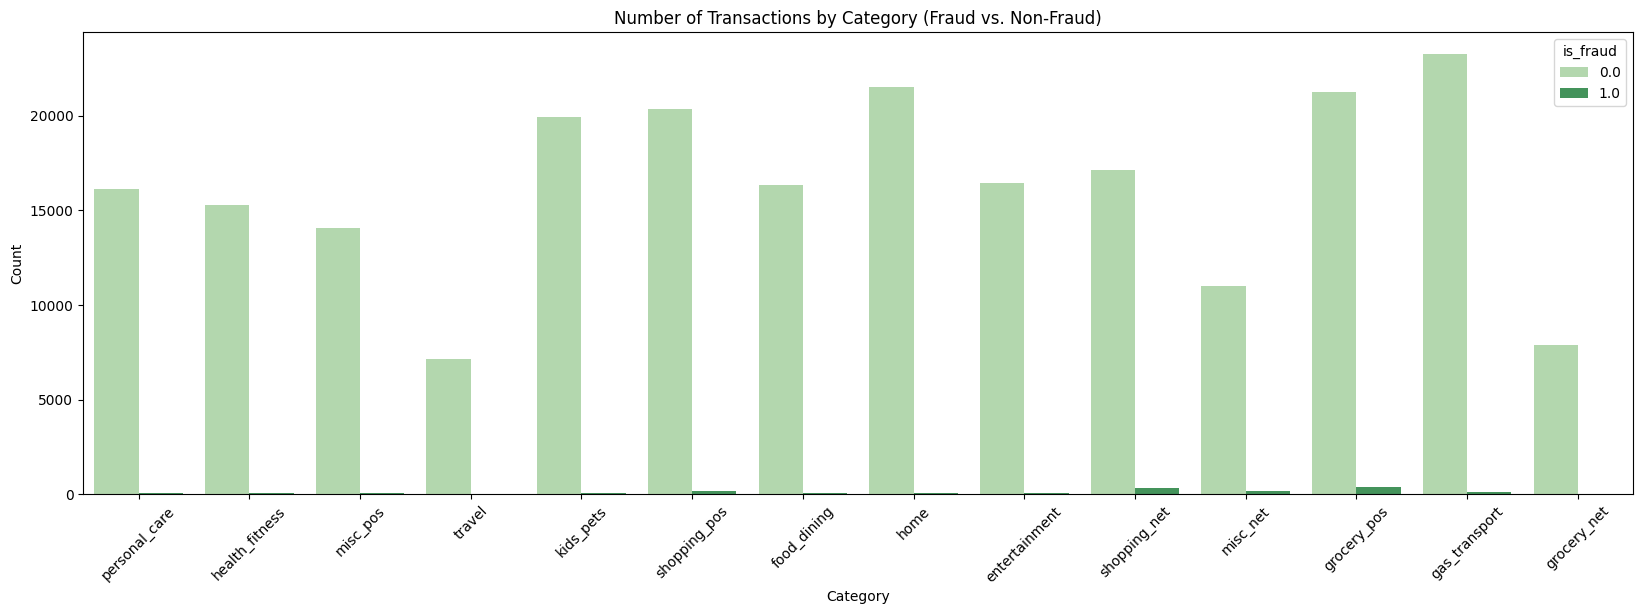

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='category', hue='is_fraud', data=df, palette='Greens')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Transactions by Category (Fraud vs. Non-Fraud)')
plt.show()

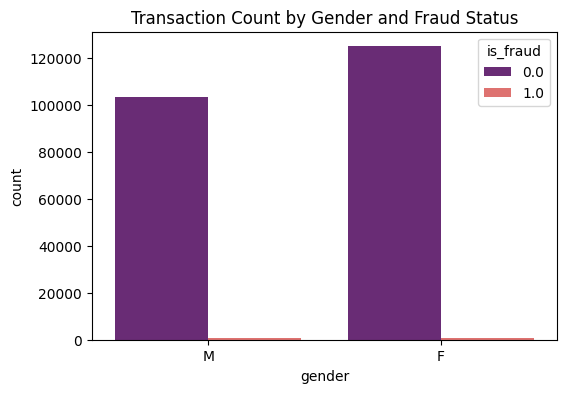

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, hue='is_fraud', palette='magma')
plt.title('Transaction Count by Gender and Fraud Status')
plt.show()

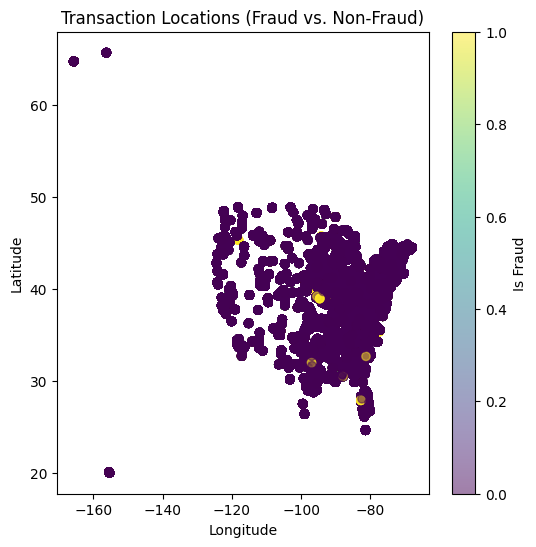

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df['long'], df['lat'], alpha=0.5, c=df['is_fraud'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Transaction Locations (Fraud vs. Non-Fraud)')
plt.colorbar(label='Is Fraud')
plt.show()

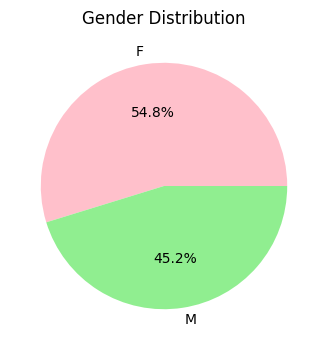

In [ ]:
plt.figure(figsize=(4,4))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightgreen'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

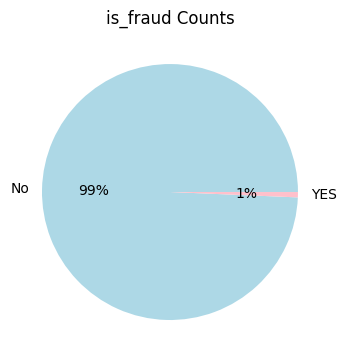

In [ ]:
exit_counts = df["is_fraud"].value_counts()
plt.figure(figsize=(7,7))
plt.subplot(1, 2, 1)
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%",colors=['lightblue','pink'])
plt.title("is_fraud Counts")
plt.tight_layout()
plt.show()

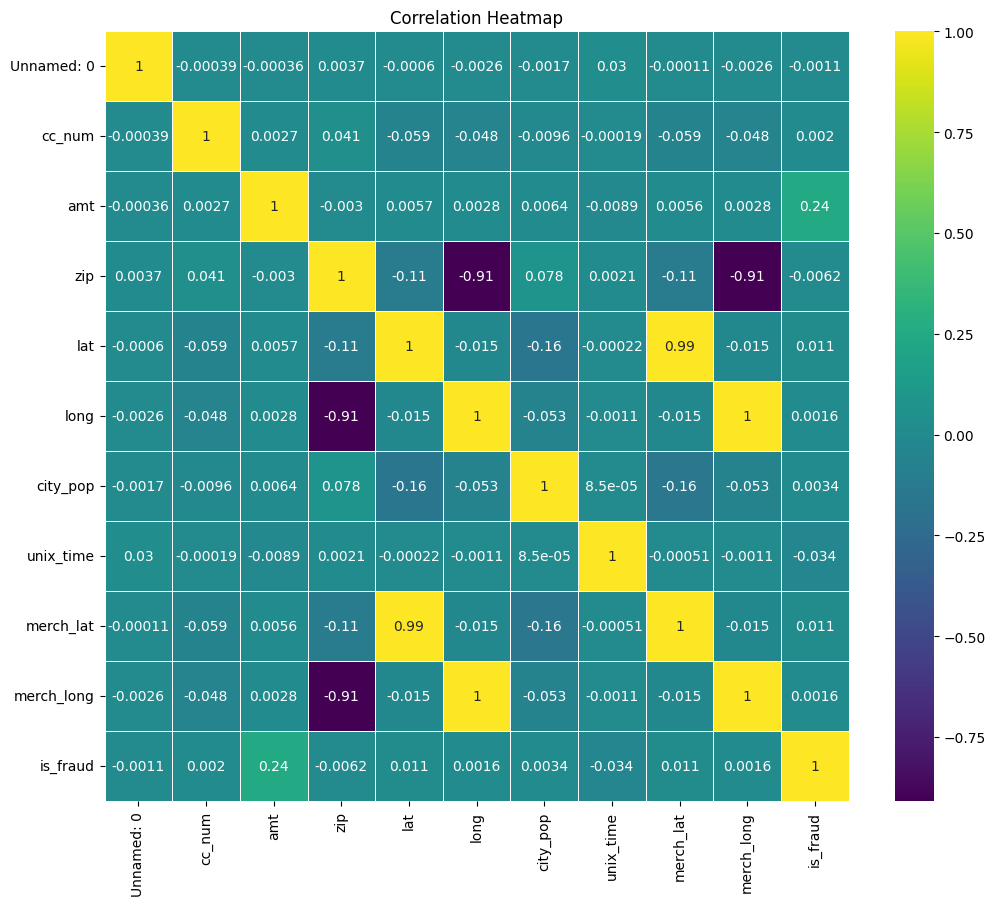

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
label_encoders = {}
label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

    df_test[col] = le.fit_transform(df_test[col])
    label_encoders[col] = le

In [ ]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

89433
0


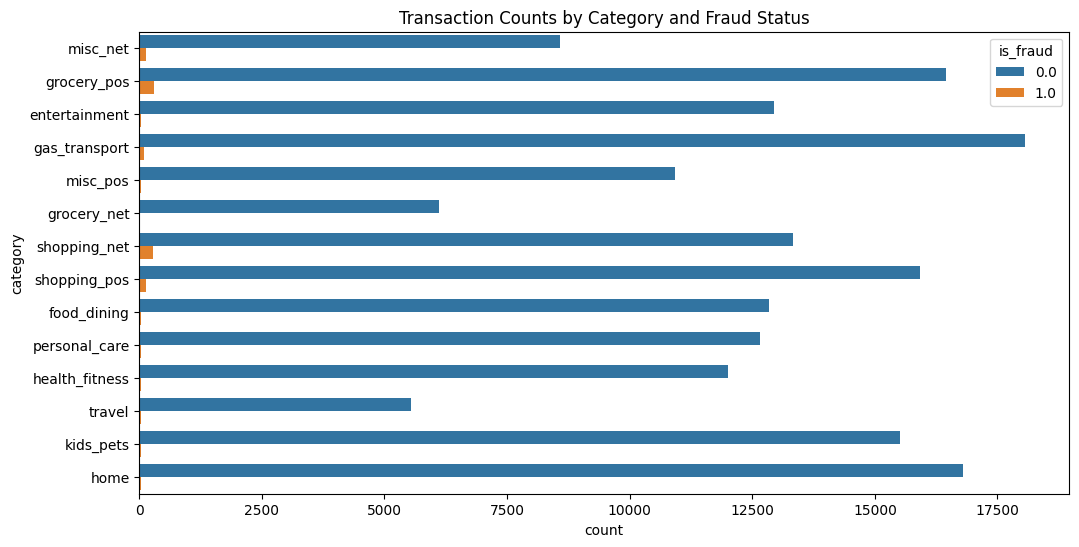

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

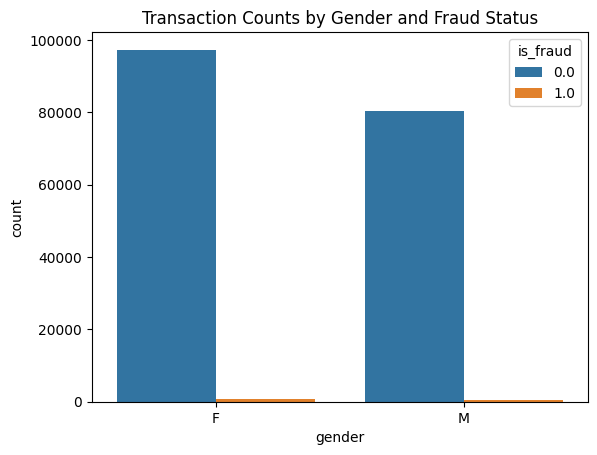

In [ ]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

<ipython-input-68-4b3640c9d93b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues')


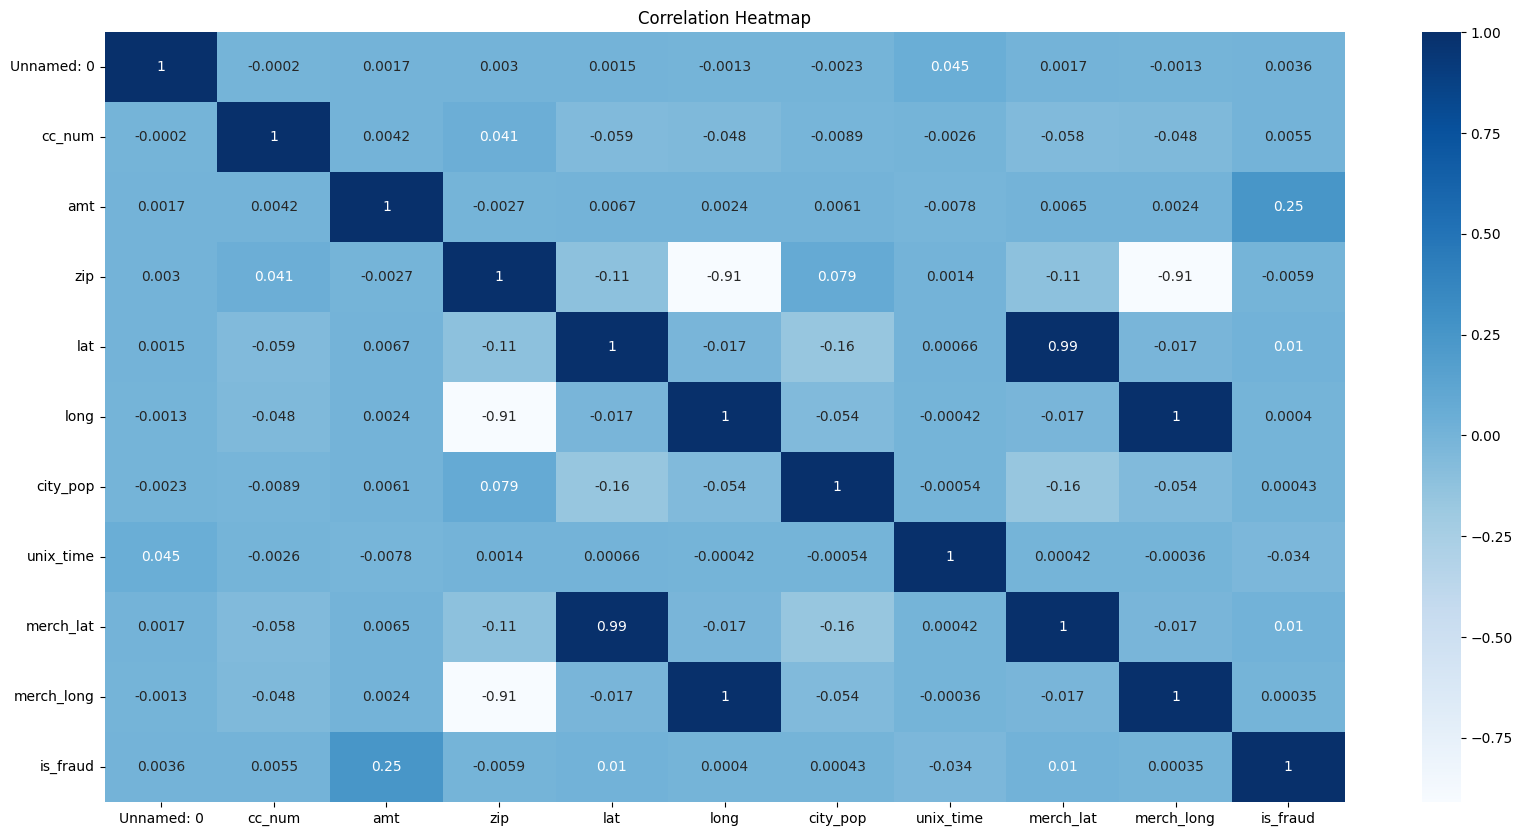

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['transaction_year'] = df['trans_date_trans_time'].dt.year
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['birth_year'] = df['dob'].dt.year
df['birth_month'] = df['dob'].dt.month
df['birth_day'] = df['dob'].dt.day
df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [ ]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_train['transaction_year'] = df_train['trans_date_trans_time'].dt.year
df_train['transaction_month'] = df_train['trans_date_trans_time'].dt.month
df_train['transaction_day'] = df_train['trans_date_trans_time'].dt.day
df_train['transaction_hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['birth_year'] = df_train['dob'].dt.year
df_train['birth_month'] = df_train['dob'].dt.month
df_train['birth_day'] = df_train['dob'].dt.day
df_train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)


In [ ]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])
df_test['transaction_year'] = df_test['trans_date_trans_time'].dt.year
df_test['transaction_month'] = df_test['trans_date_trans_time'].dt.month
df_test['transaction_day'] = df_test['trans_date_trans_time'].dt.day
df_test['transaction_hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['birth_year'] = df_test['dob'].dt.year
df_test['birth_month'] = df_test['dob'].dt.month
df_test['birth_day'] = df_test['dob'].dt.day
df_test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
df.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
df_train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
df_test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [ ]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)